#X , Y   ->  x_1:n 

       E(y|x;b) =   f( x_1:n ; b ) ->    y_1:n

#Dada una muestra D=(X,Y) de tamaño n indexadas con un variable I = list(range(n))  

#Repetir K veces el siguiente procedimiento:

# 1) Samplear con repetición de I un vector I*_k de tamaño n 

# 2) Elegir las I*_k filas de D para generar un data set D*_k (de tamaño n)

# 3) Usar D*_k para calcular un modelo de regresión f al que llameremos M*_k

# 4) Extraer de M*_k los coeficientes del modelo al cual llamaremos b*_k

In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 

In [25]:
n=50
D=np.random.rand(n,2)   #valores aleatorios, podrian ser cualquier numero
K=10000

In [26]:
I=list(range(n))
B=np.zeros((K,2)) #matriz de 0, con k filas y dos columnas
for k in range(K):
    #punto1: agarro n indices del 0 al n- 
    I_k=np.random.choice(I,size=n,replace=True)
    #punto2: del dataset D, agarro filas de los indices I_k
    D_k=D[I_k]
    #punto3: hago la regresión con D_k, donde x van a ser las filas y la primer columna (D_k[:,0])
    #y van a ser todas las filas de la segunda columna(D_k[:,1])
    M_k=sm.OLS(sm.add_constant(D_k[:,0]),D_k[:,1])
    resultado=M_k.fit()
    #punto4: me quedo con coeficientes de la regresion
    b_k=resultado.params[0] #guardo coeficientes que calcule
    B[k]=b_k

# Si quiero la distribución de los coeficientes:

# i) Calcular para cada coeficiente los cuantiles 0.025,0.25,0.5,0.75,0.9725 (en un mundo benigno, obtinese un intervalo de confianza de nivel alpha=0.95

In [27]:
quantile1 = np.quantile(B, 0.025)
quantile1

0.8893455053428226

In [28]:
quantile2 = np.quantile(B, 0.25)
quantile2

1.0370631723759276

In [29]:
quantile3 = np.quantile(B, 0.5)
quantile3

1.4364525463021862

In [30]:
quantile4 = np.quantile(B, 0.75)
quantile4

1.699334706300402

In [31]:
quantile5 = np.quantile(B, 0.9725)
quantile5

1.8786586444702238

# ii) Histograma de cada coeficiente

(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.900e+01, 3.504e+03,
         5.274e+03, 1.058e+03, 9.000e+01, 5.000e+00],
        [2.990e+02, 4.347e+03, 4.645e+03, 6.920e+02, 1.600e+01, 1.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]),
 array([0.70925147, 0.8686978 , 1.02814413, 1.18759047, 1.3470368 ,
        1.50648313, 1.66592946, 1.82537579, 1.98482212, 2.14426845,
        2.30371479]),
 <a list of 2 BarContainer objects>)

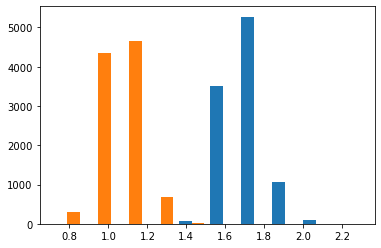

In [32]:
plt.hist(B)

# Si quiero la distribución predictiva de y^pred dado un x_nuevo, entonces:


# i) itero sobre cada uno de los B*_K (cada uno de los b*_k valores)

	# i.1) le aplico esos valores al modelo de regresión de f para predecir el valor de y^pred_k con

		# y^pred_k = f( x_nuevo ; b*_k )
		
# ii) Calcular para cada y^pred dado x_new los cuantiles 0.025,0.25,0.5,0.75,0.9725 (en un mundo benigno, obtinese un intervalo de confianza de nivel alpha=0.95

# iii) Histograma de cada y^pred que me interese


In [ ]:
y = b_k['y']   #valores de y
x = b_k['x']    #valores de x
modelo = sm.OLS(y,x)
resultados = modelo.fit()
coeficiente = resultados.params[1] #coeficiente de x

prediccion=resultado.params[0] #guardo mis y para predecir
prediccion.append(resultados.predict(b_k['x']))

b_k.append(coeficiente)
quantile1.append(coeficiente.quantile(0.025)) #ii) saco nuevamente los cuantiles
quantile2.append(coeficiente.quantile(0.25))
quantile3.append(coeficiente.quantile(0.5))
quantile4.append(coeficiente.quantile(0.75))
quantile5.append(coeficiente.quantile(0.9725))

